In [1]:
import pandas as pd
df = pd.read_csv("archive/sales.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None


In [2]:
print(df.isnull().sum())
df.duplicated().sum()


Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64


0

In [3]:
# df["Year"] = pd.to_numeric(df["Year"])
# df["Mileage_KM"] = pd.to_numeric(df["Mileage_KM"])
# df["Price_USD"] = pd.to_numeric(df["Price_USD"])
# df["Sales_Volume"] = pd.to_numeric(df["Sales_Volume"])


In [4]:
# Q4: Average price per region
avg_price_region = df.groupby("Region")["Price_USD"].mean()
print(avg_price_region)


Region
Africa           74885.771598
Asia             75554.925006
Europe           74988.356851
Middle East      74726.788487
North America    75070.054709
South America    74973.598837
Name: Price_USD, dtype: float64


In [5]:
# Q5: Count cars by Fuel Type
fuel_counts = df["Fuel_Type"].value_counts()
print(fuel_counts)


Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64


In [6]:
# Q6: Pivot Transmission vs Sales Classification
pivot = pd.pivot_table(
    df,
    index="Transmission",
    columns="Sales_Classification",
    values="Model",
    aggfunc="count",
    fill_value=0
)
print(pivot)


Sales_Classification  High    Low
Transmission                     
Automatic             7595  17251
Manual                7651  17503


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


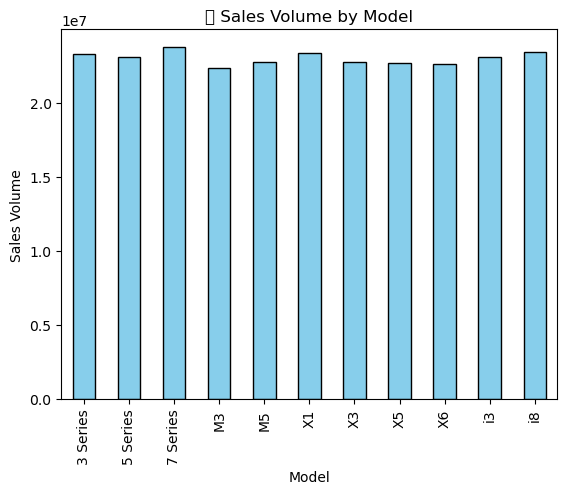

In [13]:
# Q7: Bar chart – Sales Volume by Model
import matplotlib.pyplot as plt
df3 = df.groupby("Model")["Sales_Volume"].sum()
df3.plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("📦 Sales Volume by Model")
plt.xlabel("Model")
plt.ylabel("Sales Volume")
plt.show()


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


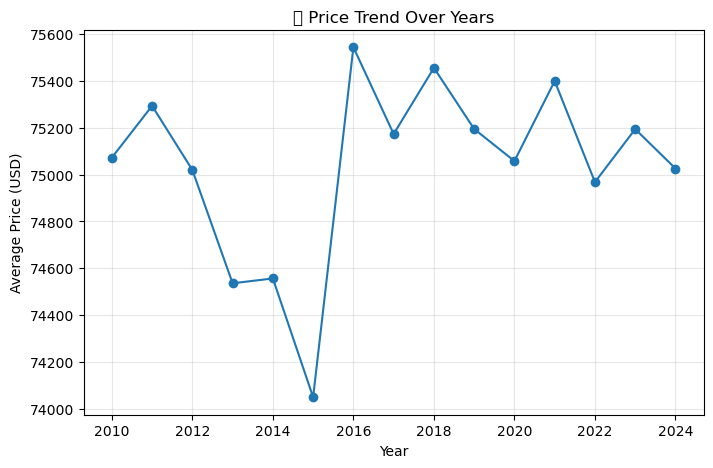

In [8]:
# Q10: Line Chart – Price Trend by Year
df.groupby("Year")["Price_USD"].mean().plot(
    kind="line", marker="o", figsize=(8,5)
)
plt.title("💰 Price Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.grid(alpha=0.3)
plt.show()


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


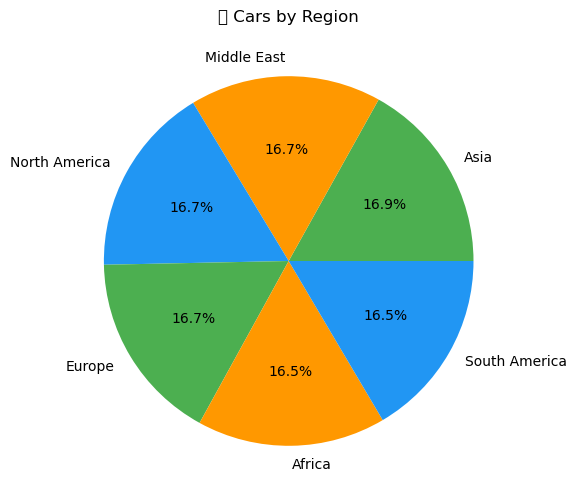

In [9]:
# Q8: Pie chart – Cars by Region
df["Region"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", figsize=(6,6), colors=["#4CAF50","#FF9800","#2196F3"]
)
plt.title("🌍 Cars by Region")
plt.ylabel("")
plt.show()
